In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")
import statsmodels.api as sm
import statistics
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_samples, silhouette_score

## Problem 1: Clustering
### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

###              1.1. Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

Read the data and do exploratory data analysis (3 pts). 
Describe the data briefly. Interpret the inferences for each (3 pts). 

Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [2]:
Bank = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
Bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.88,6.67,3.76,3.25,6.55
1,15.99,14.89,0.91,5.36,3.58,3.34,5.14
2,18.95,16.42,0.88,6.25,3.75,3.37,6.15
3,10.83,12.96,0.81,5.28,2.64,5.18,5.18
4,17.99,15.86,0.90,5.89,3.69,2.07,5.84


In [4]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
Bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41
std,2.91,1.31,0.02,0.44,0.38,1.50,0.49
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22
75%,17.30,15.71,0.89,5.98,3.56,4.77,5.88
max,21.18,17.25,0.92,6.67,4.03,8.46,6.55


### Data Pre-processing

### Treat BAD Data

In [6]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


####                 Data types are in line with the supporting data dictionary, Presense of no Bad Data is noticed

### Treat Anomalies

####                 There are apparently no noticable Anamolies, with the definition of Existing Business rules that are available

### Treat Missing Values

In [7]:
Bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

####                 There are no Missing values in the supplied DataSet

### Checking for Duplicates

In [8]:
# Are there any duplicates
dups = Bank.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


####                 There are no Duplicate values in the supplied DataSet

### Data Visualization

#### Univariate Analysis

In [9]:
Bank_univariant=Bank.describe().T
Bank_univariant_detailed=Bank_univariant
Bank_univariant_detailed['CV']=Bank_univariant_detailed['std']/Bank_univariant_detailed['mean']
Bank_univariant_detailed['Q1 - Min']= Bank_univariant_detailed['25%'] -Bank_univariant_detailed['min']
Bank_univariant_detailed['Max - 75%']= Bank_univariant_detailed['max'] -Bank_univariant_detailed['75%']
Bank_univariant_detailed['Q2 - Min']= Bank_univariant_detailed['50%'] -Bank_univariant_detailed['min']
Bank_univariant_detailed['Max - 50%']= Bank_univariant_detailed['max'] -Bank_univariant_detailed['50%']
Bank_univariant_detailed['Q2 - Q1']= Bank_univariant_detailed['50%'] -Bank_univariant_detailed['25%']
Bank_univariant_detailed['Q3 - Q2']= Bank_univariant_detailed['75%'] -Bank_univariant_detailed['50%']
Bank_univariant_detailed

,count,mean,std,min,25%,50%,75%,max,CV,Q1 - Min,Max - 75%,Q2 - Min,Max - 50%,Q2 - Q1,Q3 - Q2
spending,210.00,14.85,2.91,10.59,12.27,14.36,17.30,21.18,0.20,1.68,3.88,3.77,6.82,2.09,2.95
advance_payments,210.00,14.56,1.31,12.41,13.45,14.32,15.71,17.25,0.09,1.04,1.54,1.91,2.93,0.87,1.39
probability_of_full_payment,210.00,0.87,0.02,0.81,0.86,0.87,0.89,0.92,0.03,0.05,0.03,0.07,0.04,0.02,0.01
current_balance,210.00,5.63,0.44,4.90,5.26,5.52,5.98,6.67,0.08,0.36,0.70,0.62,1.15,0.26,0.46
credit_limit,210.00,3.26,0.38,2.63,2.94,3.24,3.56,4.03,0.12,0.31,0.47,0.61,0.80,0.29,0.32
min_payment_amt,210.00,3.70,1.50,0.77,2.56,3.60,4.77,8.46,0.41,1.80,3.69,2.83,4.86,1.04,1.17
max_spent_in_single_shopping,210.00,5.41,0.49,4.52,5.04,5.22,5.88,6.55,0.09,0.53,0.67,0.70,1.33,0.18,0.65


## Bank['spending']   5 Number Analysis

In [10]:
Bank_univariant_detailed.loc['spending']

count       210.00
mean         14.85
std           2.91
min          10.59
25%          12.27
50%          14.36
75%          17.30
max          21.18
CV            0.20
Q1 - Min      1.68
Max - 75%     3.88
Q2 - Min      3.77
Max - 50%     6.82
Q2 - Q1       2.09
Q3 - Q2       2.95
Name: spending, dtype: float64

### Bank['spending']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 1.68  <  Max - Q3 which is 3.88
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 3.77 <  (Max - Q2) which is 6.82
        (Q2 - Q1 ) which is 2.09 < (Q3 - Q2 ) which is 2.95
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='spending', ylabel='Density'>

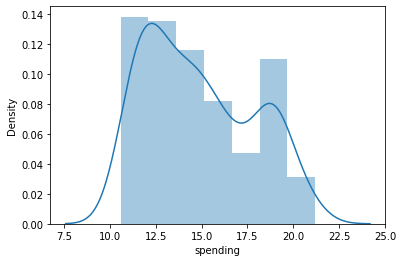

In [11]:
sns.distplot(Bank['spending'])

## Histogram Review for Bank['spending'] Shows -
#### 1) 2 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

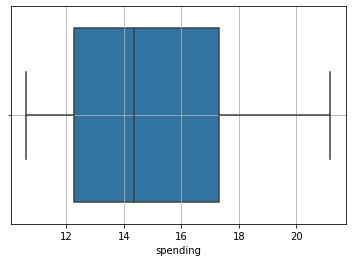

In [12]:
sns.boxplot(x=Bank['spending']) 
plt.grid()

### Bank['spending'] review of Boxplot Suggests that -

#### 1) There are No outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Bank['spending'] Empirical Rule

In [13]:
x_1std= Bank['spending'].mean() + (1 * Bank['spending'].std())
y_1std= Bank['spending'].mean() - (1 * Bank['spending'].std())
x_2std= Bank['spending'].mean() + (2 * Bank['spending'].std())
y_2std= Bank['spending'].mean() - (2 * Bank['spending'].std())
x_3std= Bank['spending'].mean() + (3 * Bank['spending'].std())
y_3std= Bank['spending'].mean() - (3 * Bank['spending'].std())

Sample_size=len(Bank['spending'])

is_between11 = Bank['spending'].between(Bank['spending'].mean(),x_1std, inclusive=False )
Level11=len(Bank[is_between11])
is_between12 = Bank['spending'].between(y_1std,Bank['spending'].mean(), inclusive=False )
Level12=len(Bank[is_between12]) 

is_between21 = Bank['spending'].between(Bank['spending'].mean(),x_2std, inclusive=False )
Level21=len(Bank[is_between21])
is_between22 = Bank['spending'].between(y_2std,Bank['spending'].mean(), inclusive=False )
Level22=len(Bank[is_between22])

is_between31 = Bank['spending'].between(Bank['spending'].mean(),x_3std, inclusive=False )
Level31=len(Bank[is_between31])
is_between32 = Bank['spending'].between(y_3std,Bank['spending'].mean(), inclusive=False )
Level32=len(Bank[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  71.4 where as they are  46
Number of Mean - 1 Sigma occurances should be  71.4 where as they are  77
Number of Mean + 2 Sigma occurances should be  99.75 where as they are  90
Number of Mean - 2 Sigma occurances should be  99.75 where as they are  116
Number of Mean + 3 Sigma occurances should be  104.685 where as they are  94
Number of Mean - 3 Sigma occurances should be  104.685 where as they are  116


### Bank['spending'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Bank['spending'] mean,median and mode

In [14]:
a=Bank['spending'].mean()
b=Bank['spending'].median()
c=Bank['spending'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 14.847523809523807 Median = 14.355 Mode = 13.573333333333332


### Bank['spending'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Amount spent by the customer per month (in 1000s) range from 10.59K to 21.18K

75% of the customer spend less than 17.30K .

From above figure, we can say that the Amount spent by the customer per month is right skewed

Average spend by customer is  14.856K which is mirginally higher than the median value 14.36K indicating that the ditribution is right tailed. 

There are no outliers Outliers  which shows data consistency.

## Bank['advance_payments']   5 Number Analysis

In [15]:
Bank_univariant_detailed.loc['advance_payments']

count       210.00
mean         14.56
std           1.31
min          12.41
25%          13.45
50%          14.32
75%          15.71
max          17.25
CV            0.09
Q1 - Min      1.04
Max - 75%     1.54
Q2 - Min      1.91
Max - 50%     2.93
Q2 - Q1       0.87
Q3 - Q2       1.39
Name: advance_payments, dtype: float64

### Bank['advance_payments']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 1.04  <  Max - Q3 which is 1.54
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 1.91 <  (Max - Q2) which is 2.93
        (Q2 - Q1 ) which is 0.87 < (Q3 - Q2 ) which is 1.39
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='advance_payments', ylabel='Density'>

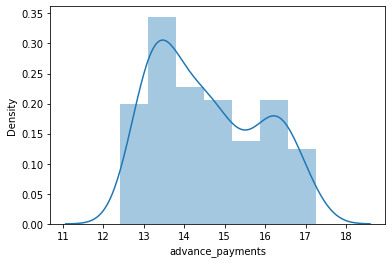

In [16]:
sns.distplot(Bank['advance_payments'])

## Histogram Review for Bank['advance_payments'] Shows -
#### 1) 2 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

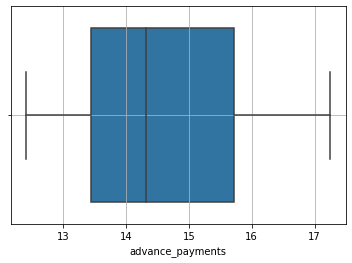

In [17]:
sns.boxplot(x=Bank['advance_payments']) 
plt.grid()

### Bank['advance_payments'] review of Boxplot Suggests that -

#### 1) There are No outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Bank['advance_payments'] Empirical Rule

In [18]:
x_1std= Bank['advance_payments'].mean() + (1 * Bank['advance_payments'].std())
y_1std= Bank['advance_payments'].mean() - (1 * Bank['advance_payments'].std())
x_2std= Bank['advance_payments'].mean() + (2 * Bank['advance_payments'].std())
y_2std= Bank['advance_payments'].mean() - (2 * Bank['advance_payments'].std())
x_3std= Bank['advance_payments'].mean() + (3 * Bank['advance_payments'].std())
y_3std= Bank['advance_payments'].mean() - (3 * Bank['advance_payments'].std())

Sample_size=len(Bank['advance_payments'])
is_between11 = Bank['advance_payments'].between(Bank['advance_payments'].mean(),x_1std, inclusive=False )
Level11=len(Bank[is_between11])
is_between12 = Bank['advance_payments'].between(y_1std,Bank['advance_payments'].mean(), inclusive=False )
Level12=len(Bank[is_between12]) 
is_between21 = Bank['advance_payments'].between(Bank['advance_payments'].mean(),x_2std, inclusive=False )
Level21=len(Bank[is_between21])
is_between22 = Bank['advance_payments'].between(y_2std,Bank['advance_payments'].mean(), inclusive=False )
Level22=len(Bank[is_between22])
is_between31 = Bank['advance_payments'].between(Bank['advance_payments'].mean(),x_3std, inclusive=False )
Level31=len(Bank[is_between31])
is_between32 = Bank['advance_payments'].between(y_3std,Bank['advance_payments'].mean(), inclusive=False )
Level32=len(Bank[is_between32])
print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  71.4 where as they are  46
Number of Mean - 1 Sigma occurances should be  71.4 where as they are  77
Number of Mean + 2 Sigma occurances should be  99.75 where as they are  91
Number of Mean - 2 Sigma occurances should be  99.75 where as they are  116
Number of Mean + 3 Sigma occurances should be  104.685 where as they are  94
Number of Mean - 3 Sigma occurances should be  104.685 where as they are  116


### Bank['advance_payments'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Bank['advance_payments'] mean,median and mode

In [19]:
a=Bank['advance_payments'].mean()
b=Bank['advance_payments'].median()
c=Bank['advance_payments'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 14.559285714285714 Median = 14.32 Mode = 13.47


### Bank['advance_payments'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Amount paid by the customer in advance by cash range from 1.241K to 1.725K

75% of the customer's advance payment is less than 1.571K .

From above figure, we can say that the Amount spent by the customer per month is right skewed

Average spend by customer is  1.456K which is mirginally higher than the median value 1.432K indicating that the ditribution is right tailed. 

There are no outliers Outliers  which shows data consistency.

## Bank['probability_of_full_payment']   5 Number Analysis

In [20]:
Bank_univariant_detailed.loc['probability_of_full_payment']

count       210.00
mean          0.87
std           0.02
min           0.81
25%           0.86
50%           0.87
75%           0.89
max           0.92
CV            0.03
Q1 - Min      0.05
Max - 75%     0.03
Q2 - Min      0.07
Max - 50%     0.04
Q2 - Q1       0.02
Q3 - Q2       0.01
Name: probability_of_full_payment, dtype: float64

### Bank['probability_of_full_payment']  review of 5 number Summary Suggests that -

  ##### Disribution is  Left skewed  -
        (Q1 - Min) which is 0.05 >  Max - Q3 which is 0.03
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 0.07 >  (Max - Q2) which is 0.04
        (Q2 - Q1 ) which is 0.02 > (Q3 - Q2 ) which is 0.01
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='Density'>

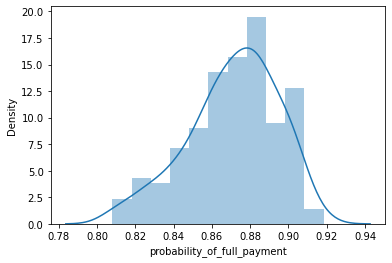

In [21]:
sns.distplot(Bank['probability_of_full_payment'])

# Histogram Review for Bank['probability_of_full_payment'] Shows -
#### 1) 1 Peaks
#### 2) Left Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

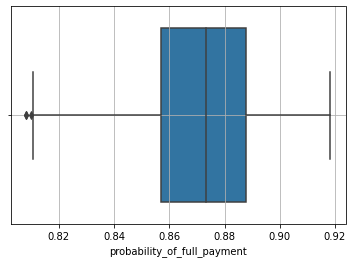

In [22]:
sns.boxplot(x=Bank['probability_of_full_payment']) 
plt.grid()

### Bank['probability_of_full_payment'] review of Boxplot Suggests that -

#### 1) There are  couple of outliers
#### 2) Distribution is LeftSkewed due to longer Left Whisker

## Bank['probability_of_full_payment'] Empirical Rule

In [23]:
x_1std= Bank['probability_of_full_payment'].mean() + (1 * Bank['probability_of_full_payment'].std())
y_1std= Bank['probability_of_full_payment'].mean() - (1 * Bank['probability_of_full_payment'].std())
x_2std= Bank['probability_of_full_payment'].mean() + (2 * Bank['probability_of_full_payment'].std())
y_2std= Bank['probability_of_full_payment'].mean() - (2 * Bank['probability_of_full_payment'].std())
x_3std= Bank['probability_of_full_payment'].mean() + (3 * Bank['probability_of_full_payment'].std())
y_3std= Bank['probability_of_full_payment'].mean() - (3 * Bank['probability_of_full_payment'].std())

Sample_size=len(Bank['probability_of_full_payment'])
is_between11 = Bank['probability_of_full_payment'].between(Bank['probability_of_full_payment'].mean(),x_1std, inclusive=False )
Level11=len(Bank[is_between11])
is_between12 = Bank['probability_of_full_payment'].between(y_1std,Bank['probability_of_full_payment'].mean(), inclusive=False )
Level12=len(Bank[is_between12]) 
is_between21 = Bank['probability_of_full_payment'].between(Bank['probability_of_full_payment'].mean(),x_2std, inclusive=False )
Level21=len(Bank[is_between21])
is_between22 = Bank['probability_of_full_payment'].between(y_2std,Bank['probability_of_full_payment'].mean(), inclusive=False )
Level22=len(Bank[is_between22])
is_between31 = Bank['probability_of_full_payment'].between(Bank['probability_of_full_payment'].mean(),x_3std, inclusive=False )
Level31=len(Bank[is_between31])
is_between32 = Bank['probability_of_full_payment'].between(y_3std,Bank['probability_of_full_payment'].mean(), inclusive=False )
Level32=len(Bank[is_between32])
print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  71.4 where as they are  80
Number of Mean - 1 Sigma occurances should be  71.4 where as they are  59
Number of Mean + 2 Sigma occurances should be  99.75 where as they are  115
Number of Mean - 2 Sigma occurances should be  99.75 where as they are  86
Number of Mean + 3 Sigma occurances should be  104.685 where as they are  116
Number of Mean - 3 Sigma occurances should be  104.685 where as they are  94


### Bank['probability_of_full_payment'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Left Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Left Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Left Skewed)

##  Bank['probability_of_full_payment'] mean,median and mode

In [24]:
a=Bank['probability_of_full_payment'].mean()
b=Bank['probability_of_full_payment'].median()
c=Bank['probability_of_full_payment'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 0.8709985714285714 Median = 0.8734500000000001 Mode = 0.8823


### Bank['probability_of_full_payment'] review of Mean, Median and Mode suggests that -

#### In this case Mean< Median < Mode hence the distribution is Left Skewed

#### Insights:

Probability of payment done in full by the customer to the bank
range from 0.81 to 0.92

Probability that 75% of the customers will pay in full is less than  0.89 .

From above figure, we can say that the Amount spent by the customer per month is Letf skewed

Average probability as well as median value of probability that customer will pay in full is same and is 0.87

There are couple of Outliers  towards lower probability of full payment

## Bank['current_balance']   5 Number Analysis

In [25]:
Bank_univariant_detailed.loc['current_balance']

count       210.00
mean          5.63
std           0.44
min           4.90
25%           5.26
50%           5.52
75%           5.98
max           6.67
CV            0.08
Q1 - Min      0.36
Max - 75%     0.70
Q2 - Min      0.62
Max - 50%     1.15
Q2 - Q1       0.26
Q3 - Q2       0.46
Name: current_balance, dtype: float64

### Bank['current_balance']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 0.36 <  Max - Q3 which is 0.70
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 0.62 <  (Max - Q2) which is 1.15
        (Q2 - Q1 ) which is 0.26 < (Q3 - Q2 ) which is 0.46
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='current_balance', ylabel='Density'>

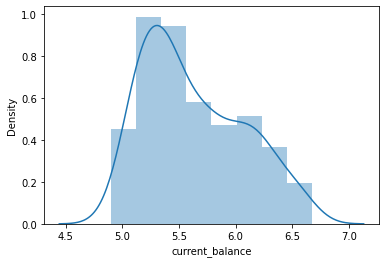

In [26]:
sns.distplot(Bank['current_balance'])

## Histogram Review for Bank['current_balance'] Shows -
#### 1) 2 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

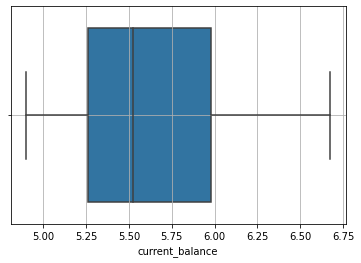

In [27]:
sns.boxplot(x=Bank['current_balance']) 
plt.grid()

### Bank['current_balance'] review of Boxplot Suggests that -

#### 1) There are No outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Bank['current_balance'] Empirical Rule

In [28]:
x_1std= Bank['current_balance'].mean() + (1 * Bank['current_balance'].std())
y_1std= Bank['current_balance'].mean() - (1 * Bank['current_balance'].std())
x_2std= Bank['current_balance'].mean() + (2 * Bank['current_balance'].std())
y_2std= Bank['current_balance'].mean() - (2 * Bank['current_balance'].std())
x_3std= Bank['current_balance'].mean() + (3 * Bank['current_balance'].std())
y_3std= Bank['current_balance'].mean() - (3 * Bank['current_balance'].std())

Sample_size=len(Bank['current_balance'])
is_between11 = Bank['current_balance'].between(Bank['current_balance'].mean(),x_1std, inclusive=False )
Level11=len(Bank[is_between11])
is_between12 = Bank['current_balance'].between(y_1std,Bank['current_balance'].mean(), inclusive=False )
Level12=len(Bank[is_between12]) 
is_between21 = Bank['current_balance'].between(Bank['current_balance'].mean(),x_2std, inclusive=False )
Level21=len(Bank[is_between21])
is_between22 = Bank['current_balance'].between(y_2std,Bank['current_balance'].mean(), inclusive=False )
Level22=len(Bank[is_between22])
is_between31 = Bank['current_balance'].between(Bank['current_balance'].mean(),x_3std, inclusive=False )
Level31=len(Bank[is_between31])
is_between32 = Bank['current_balance'].between(y_3std,Bank['current_balance'].mean(), inclusive=False )
Level32=len(Bank[is_between32])
print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)


Number of Mean + 1 Sigma occurances should be  71.4 where as they are  50
Number of Mean - 1 Sigma occurances should be  71.4 where as they are  80
Number of Mean + 2 Sigma occurances should be  99.75 where as they are  85
Number of Mean - 2 Sigma occurances should be  99.75 where as they are  118
Number of Mean + 3 Sigma occurances should be  104.685 where as they are  92
Number of Mean - 3 Sigma occurances should be  104.685 where as they are  118


### Bank['current_balance'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Bank['current_balance'] mean,median and mode

In [29]:
a=Bank['current_balance'].mean()
b=Bank['current_balance'].median()
c=Bank['current_balance'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 5.628533333333333 Median = 5.5235 Mode = 5.3155


### Bank['current_balance'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Balance amount left in the account to make purchases (in 1000s)range from 4.90K to  6.67K

75% of the customer's balance left is less than  5.98K .

From above figure, we can say that the Amount spent by the customer per month is right skewed

Average spend by customer is   5.63K which is mirginally higher than the median value  5.52K indicating that the ditribution is right tailed. 

There are no outliers Outliers  which shows data consistency.

## Bank['credit_limit']   5 Number Analysis

In [30]:
Bank_univariant_detailed.loc['credit_limit']

count       210.00
mean          3.26
std           0.38
min           2.63
25%           2.94
50%           3.24
75%           3.56
max           4.03
CV            0.12
Q1 - Min      0.31
Max - 75%     0.47
Q2 - Min      0.61
Max - 50%     0.80
Q2 - Q1       0.29
Q3 - Q2       0.32
Name: credit_limit, dtype: float64

### Bank['credit_limit']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 0.31 <  Max - Q3 which is 0.47
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 0.61 <  (Max - Q2) which is 0.80
        (Q2 - Q1 ) which is 0.29 < (Q3 - Q2 ) which is 0.32
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='credit_limit', ylabel='Density'>

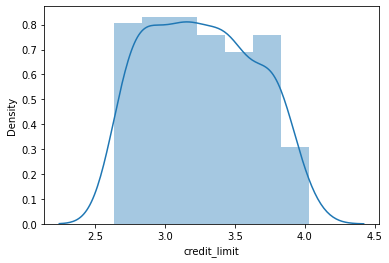

In [31]:
sns.distplot(Bank['credit_limit'])

## Histogram Review for Bank['credit_limit'] Shows -
#### 1) Flat top
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

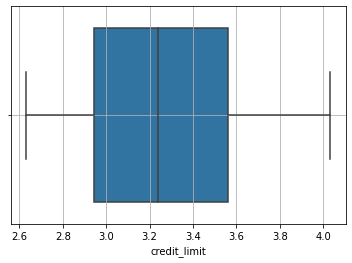

In [32]:
sns.boxplot(x=Bank['credit_limit']) 
plt.grid()

### Bank['credit_limit'] review of Boxplot Suggests that -

#### 1) There are No outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Bank['credit_limit'] Empirical Rule

In [33]:
x_1std= Bank['credit_limit'].mean() + (1 * Bank['credit_limit'].std())
y_1std= Bank['credit_limit'].mean() - (1 * Bank['credit_limit'].std())
x_2std= Bank['credit_limit'].mean() + (2 * Bank['credit_limit'].std())
y_2std= Bank['credit_limit'].mean() - (2 * Bank['credit_limit'].std())
x_3std= Bank['credit_limit'].mean() + (3 * Bank['credit_limit'].std())
y_3std= Bank['credit_limit'].mean() - (3 * Bank['credit_limit'].std())

Sample_size=len(Bank['credit_limit'])
is_between11 = Bank['credit_limit'].between(Bank['credit_limit'].mean(),x_1std, inclusive=False )
Level11=len(Bank[is_between11])
is_between12 = Bank['credit_limit'].between(y_1std,Bank['credit_limit'].mean(), inclusive=False )
Level12=len(Bank[is_between12]) 
is_between21 = Bank['credit_limit'].between(Bank['credit_limit'].mean(),x_2std, inclusive=False )
Level21=len(Bank[is_between21])
is_between22 = Bank['credit_limit'].between(y_2std,Bank['credit_limit'].mean(), inclusive=False )
Level22=len(Bank[is_between22])
is_between31 = Bank['credit_limit'].between(Bank['credit_limit'].mean(),x_3std, inclusive=False )
Level31=len(Bank[is_between31])
is_between32 = Bank['credit_limit'].between(y_3std,Bank['credit_limit'].mean(), inclusive=False )
Level32=len(Bank[is_between32])
print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)


Number of Mean + 1 Sigma occurances should be  71.4 where as they are  57
Number of Mean - 1 Sigma occurances should be  71.4 where as they are  63
Number of Mean + 2 Sigma occurances should be  99.75 where as they are  100
Number of Mean - 2 Sigma occurances should be  99.75 where as they are  108
Number of Mean + 3 Sigma occurances should be  104.685 where as they are  102
Number of Mean - 3 Sigma occurances should be  104.685 where as they are  108


### Bank['credit_limit'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Bank['credit_limit'] mean,median and mode

In [34]:
a=Bank['credit_limit'].mean()
b=Bank['credit_limit'].median()
c=Bank['credit_limit'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 3.258604761904762 Median = 3.237 Mode = 3.026


### Bank['credit_limit'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Limit of the amount in credit card (10000s) range from 26.3K to  40.03K

75% of the customer's  credit limit  is less than  35.6K .

From above figure, we can say that the Amount spent by the customer per month is right skewed

Average spend by customer is 32.6 K which is mirginally higher than the median value  32.4K indicating that the ditribution is right tailed. 

There are no outliers Outliers  which shows data consistency.

## Bank['max_spent_in_single_shopping']   5 Number Analysis

In [35]:
Bank_univariant_detailed.loc['max_spent_in_single_shopping']

count       210.00
mean          5.41
std           0.49
min           4.52
25%           5.04
50%           5.22
75%           5.88
max           6.55
CV            0.09
Q1 - Min      0.53
Max - 75%     0.67
Q2 - Min      0.70
Max - 50%     1.33
Q2 - Q1       0.18
Q3 - Q2       0.65
Name: max_spent_in_single_shopping, dtype: float64

### Bank['max_spent_in_single_shopping']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 0.53 <  Max - Q3 which is 0.67
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 0.70 <  (Max - Q2) which is 1.33
        (Q2 - Q1 ) which is 0.18 < (Q3 - Q2 ) which is 0.65
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Density'>

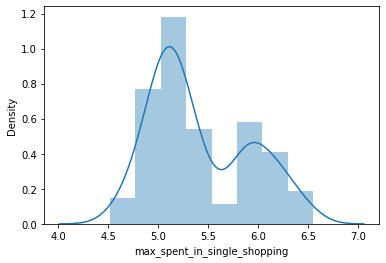

In [36]:
sns.distplot(Bank['max_spent_in_single_shopping'])

## Histogram Review for Bank['max_spent_in_single_shopping'] Shows -
#### 1) 2 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

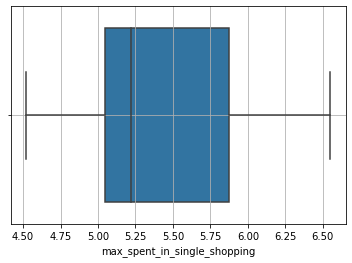

In [37]:
sns.boxplot(x=Bank['max_spent_in_single_shopping']) 
plt.grid()

### Bank['max_spent_in_single_shopping'] review of Boxplot Suggests that -

#### 1) There are No outliers
#### 2) Distribution is RightSkewed due to marginally longer Right Whisker

## Bank['max_spent_in_single_shopping'] Empirical Rule

In [38]:
x_1std= Bank['max_spent_in_single_shopping'].mean() + (1 * Bank['max_spent_in_single_shopping'].std())
y_1std= Bank['max_spent_in_single_shopping'].mean() - (1 * Bank['max_spent_in_single_shopping'].std())
x_2std= Bank['max_spent_in_single_shopping'].mean() + (2 * Bank['max_spent_in_single_shopping'].std())
y_2std= Bank['max_spent_in_single_shopping'].mean() - (2 * Bank['max_spent_in_single_shopping'].std())
x_3std= Bank['max_spent_in_single_shopping'].mean() + (3 * Bank['max_spent_in_single_shopping'].std())
y_3std= Bank['max_spent_in_single_shopping'].mean() - (3 * Bank['max_spent_in_single_shopping'].std())

Sample_size=len(Bank['max_spent_in_single_shopping'])
is_between11 = Bank['max_spent_in_single_shopping'].between(Bank['max_spent_in_single_shopping'].mean(),x_1std, inclusive=False )
Level11=len(Bank[is_between11])
is_between12 = Bank['max_spent_in_single_shopping'].between(y_1std,Bank['max_spent_in_single_shopping'].mean(), inclusive=False )
Level12=len(Bank[is_between12]) 
is_between21 = Bank['max_spent_in_single_shopping'].between(Bank['max_spent_in_single_shopping'].mean(),x_2std, inclusive=False )
Level21=len(Bank[is_between21])
is_between22 = Bank['max_spent_in_single_shopping'].between(y_2std,Bank['max_spent_in_single_shopping'].mean(), inclusive=False )
Level22=len(Bank[is_between22])
is_between31 = Bank['max_spent_in_single_shopping'].between(Bank['max_spent_in_single_shopping'].mean(),x_3std, inclusive=False )
Level31=len(Bank[is_between31])
is_between32 = Bank['max_spent_in_single_shopping'].between(y_3std,Bank['max_spent_in_single_shopping'].mean(), inclusive=False )
Level32=len(Bank[is_between32])
print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)


Number of Mean + 1 Sigma occurances should be  71.4 where as they are  32
Number of Mean - 1 Sigma occurances should be  71.4 where as they are  106
Number of Mean + 2 Sigma occurances should be  99.75 where as they are  73
Number of Mean - 2 Sigma occurances should be  99.75 where as they are  131
Number of Mean + 3 Sigma occurances should be  104.685 where as they are  79
Number of Mean - 3 Sigma occurances should be  104.685 where as they are  131


### Bank['max_spent_in_single_shopping'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Bank['max_spent_in_single_shopping'] mean,median and mode

In [39]:
a=Bank['max_spent_in_single_shopping'].mean()
b=Bank['max_spent_in_single_shopping'].median()
c=Bank['max_spent_in_single_shopping'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 5.4080714285714295 Median = 5.223000000000001 Mode = 5.001


### Bank['max_spent_in_single_shopping'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

minimum paid by the customer while making payments for purchases made monthly (in 100s)
range from 0.452K to  0.655K

75% of the customer's  credit limit  is less than  0.588K .

From above figure, we can say that the Amount spent by the customer per month is right skewed

Average spend by customer is 0.541 K which is mirginally higher than the median value 0.522K indicating that the ditribution is right tailed. 

There are no outliers which shows data consistency.

####  Bivariate Analysis

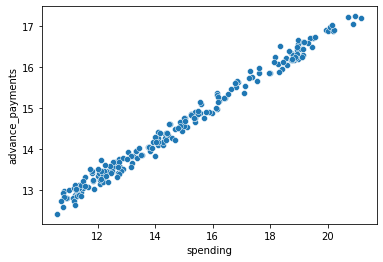

In [40]:
sns.scatterplot(x='spending', y='advance_payments', data=Bank) 
plt.ticklabel_format(style='plain', axis='x')

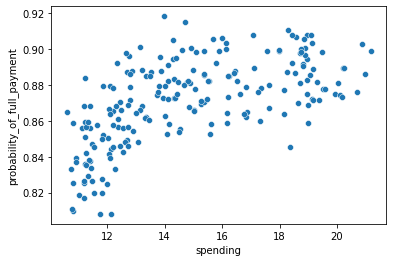

In [41]:
sns.scatterplot(x='spending', y='probability_of_full_payment', data=Bank) 
plt.ticklabel_format(style='plain', axis='x')

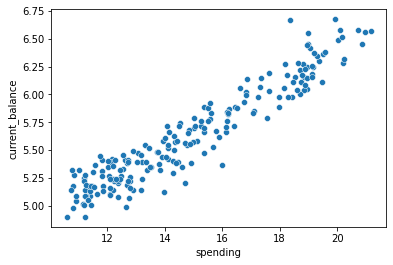

In [42]:
sns.scatterplot(x='spending', y='current_balance', data=Bank) 
plt.ticklabel_format(style='plain', axis='x')

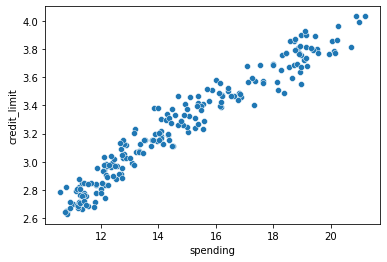

In [43]:
sns.scatterplot(x='spending', y='credit_limit', data=Bank) 
plt.ticklabel_format(style='plain', axis='x')

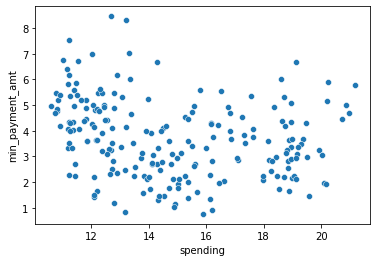

In [44]:
sns.scatterplot(x='spending', y='min_payment_amt', data=Bank) 
plt.ticklabel_format(style='plain', axis='x')

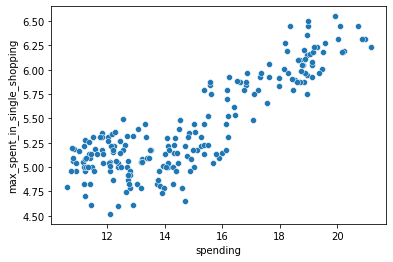

In [45]:
sns.scatterplot(x='spending', y='max_spent_in_single_shopping', data=Bank) 
plt.ticklabel_format(style='plain', axis='x')

### Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [47]:
lrprob,urprob=remove_outlier(Bank['probability_of_full_payment'])
Bank['probability_of_full_payment']=np.where(Bank['probability_of_full_payment']>urprob,urprob,Bank['probability_of_full_payment'])
Bank['probability_of_full_payment']=np.where(Bank['probability_of_full_payment']<lrprob,lrprob,Bank['probability_of_full_payment'])

Bank.shape

(210, 7)

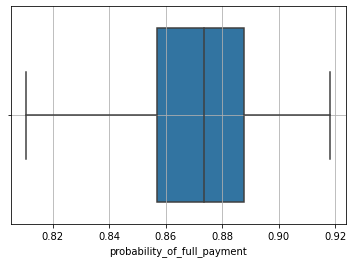

In [48]:
sns.boxplot(x=Bank['probability_of_full_payment']) 
plt.grid()

In [49]:
Bank.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


###              1.2  Do you think scaling is necessary for clustering in this case? Justify

In [50]:
Bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41
std,2.91,1.31,0.02,0.44,0.38,1.50,0.49
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22
75%,17.30,15.71,0.89,5.98,3.56,4.77,5.88
max,21.18,17.25,0.92,6.67,4.03,8.46,6.55


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
X = StandardScaler()

In [53]:
Bank.columns[0:]

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [54]:
# Bank=Bank.drop(['probability_of_full_payment'], axis = 1)

In [55]:
Bank_scaled = pd.DataFrame(X.fit_transform(Bank.iloc[:,0:7]),columns=Bank.columns[0:7])

In [56]:
Bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.75,1.81,0.18,2.37,1.34,-0.30,2.33
1,0.39,0.25,1.51,-0.60,0.86,-0.24,-0.54
2,1.41,1.43,0.51,1.40,1.32,-0.22,1.51
3,-1.38,-1.23,-2.57,-0.79,-1.64,0.99,-0.45
4,1.08,1.00,1.20,0.59,1.16,-1.09,0.87


###              1.3. Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [58]:
Bank_scaled.iloc[:,0:7]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.75,1.81,0.18,2.37,1.34,-0.30,2.33
1,0.39,0.25,1.51,-0.60,0.86,-0.24,-0.54
2,1.41,1.43,0.51,1.40,1.32,-0.22,1.51
3,-1.38,-1.23,-2.57,-0.79,-1.64,0.99,-0.45
4,1.08,1.00,1.20,0.59,1.16,-1.09,0.87
...,...,...,...,...,...,...,...
205,-0.33,-0.41,0.72,-0.43,-0.16,0.19,-1.37
206,0.66,0.81,-0.31,0.68,0.48,0.81,0.79
207,-0.28,-0.31,0.36,-0.43,-0.15,-1.32,-0.83
208,0.44,0.34,1.23,0.18,0.60,-0.95,0.07


In [59]:
link_method = linkage(Bank_scaled.iloc[:,0:8], method = 'average')

In [60]:
labelList = np.arange(len(Bank_scaled))

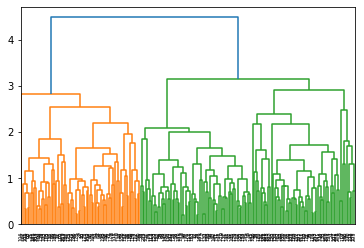

In [61]:
dend = dendrogram(link_method,labels = labelList)

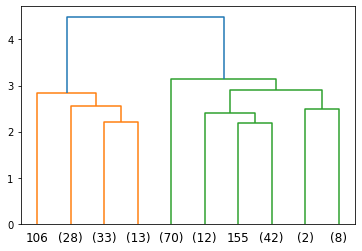

In [62]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p=10,
                 labels=labelList)

In [63]:
clusters = fcluster(link_method,3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [64]:
Bank['clusters'] = clusters

In [66]:
Bank.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [67]:
aggdata=Bank.iloc[:,0:8].groupby('clusters').mean().sort_values(by='spending')
aggdata['Freq']=Bank.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
2,11.92,13.29,0.85,5.26,2.85,4.62,5.12,70
3,14.22,14.20,0.88,5.44,3.25,2.77,5.06,65
1,18.13,16.06,0.88,6.14,3.65,3.65,5.99,75


In [68]:
aggdata.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
count,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
mean,14.75,14.51,0.87,5.61,3.25,3.68,5.39,70.00
std,3.14,1.41,0.02,0.46,0.40,0.93,0.52,5.00
min,11.92,13.29,0.85,5.26,2.85,2.77,5.06,65.00
25%,13.07,13.74,0.86,5.35,3.05,3.21,5.09,67.50
50%,14.22,14.20,0.88,5.44,3.25,3.65,5.12,70.00
75%,16.17,15.13,0.88,5.79,3.45,4.13,5.55,72.50
max,18.13,16.06,0.88,6.14,3.65,4.62,5.99,75.00


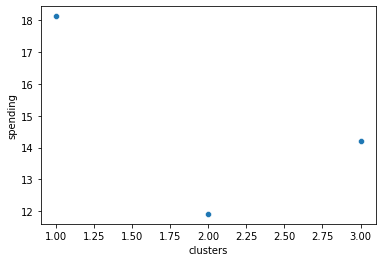

In [69]:
sns.scatterplot(x='clusters', y='spending', data=aggdata) 
plt.ticklabel_format(style='plain', axis='x')

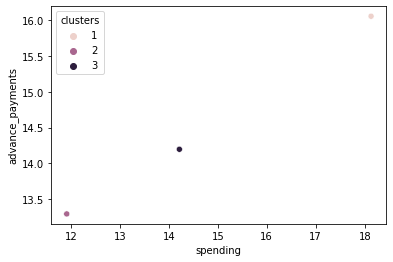

In [70]:
sns.scatterplot(x='spending', y='advance_payments',hue='clusters', data=aggdata) 
plt.ticklabel_format(style='plain', axis='x')

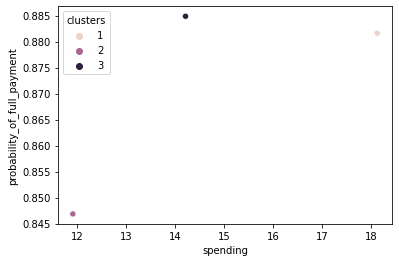

In [71]:
sns.scatterplot(x='spending', y='probability_of_full_payment',hue='clusters', data=aggdata)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='spending', y='current_balance',hue='clusters', data=aggdata)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='spending', y='credit_limit',hue='clusters', data=aggdata)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='spending', y='min_payment_amt',hue='clusters', data=aggdata)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='spending', y='max_spent_in_single_shopping',hue='clusters', data=aggdata)
plt.ticklabel_format(style='plain', axis='x')

###             1.4. Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

### Calculating WSS for other values of K - Elbow Method

In [72]:
wss =[] 

In [73]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(Bank_scaled)
    wss.append(KM.inertia_)

In [74]:
wss

[1470.0,
 659.1089125654629,
 430.51206029051684,
 371.16487493380384,
 327.90200158429354,
 290.34216771393557,
 262.06970623006134,
 240.7389726714008,
 224.559263493065,
 206.35880459576322]

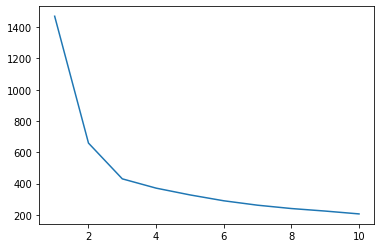

In [75]:
plt.plot(range(1,11), wss)

# KMeans

In [76]:
sls =[] 
for i in range(2,12):
    k_means = KMeans(n_clusters=i, random_state=1)
    k_means.fit(Bank_scaled)
    labels = k_means.labels_
#     print(x-silhouette_score(Bank_scaled,labels, random_state=1))
#     x= silhouette_score(Bank_scaled,labels, random_state=1)
    sls.append(silhouette_score(Bank_scaled,labels, random_state=1))

In [77]:
sls

[0.465776699623352,
 0.40086389728433913,
 0.32775518030020434,
 0.27853448242928874,
 0.2746325704750688,
 0.28027106808343505,
 0.25765014957752674,
 0.26517588612934323,
 0.240471942121349,
 0.256392899804882]

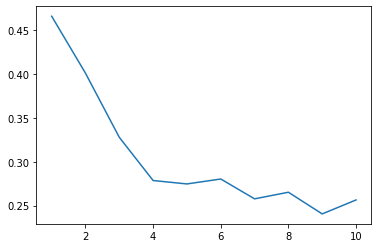

In [78]:
plt.plot(range(1,11), sls)

In [79]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(Bank_scaled)
labels = k_means.labels_

In [80]:
# Bank=Bank.drop(['clusters','labels'],axis=1)
Bank["Clus_kmeans4"] = labels
Bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans4
0,19.94,16.92,0.88,6.67,3.76,3.25,6.55,1,1
1,15.99,14.89,0.91,5.36,3.58,3.34,5.14,3,2
2,18.95,16.42,0.88,6.25,3.75,3.37,6.15,1,1
3,10.83,12.96,0.81,5.28,2.64,5.18,5.18,2,0
4,17.99,15.86,0.90,5.89,3.69,2.07,5.84,1,1


# Cluster Profiling

In [81]:
Bank.Clus_kmeans4.value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans4, dtype: int64

In [82]:
Bank=Bank.drop(['clusters'],axis=1)
clust_profile=Bank.iloc[:,0:8].groupby('Clus_kmeans4').mean().sort_values(by='spending')
clust_profile['Freq']=Bank.Clus_kmeans4.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clus_kmeans4,,,,,,,,
0,11.86,13.25,0.85,5.23,2.85,4.74,5.10,72
2,14.44,14.34,0.88,5.51,3.26,2.71,5.12,71
1,18.50,16.20,0.88,6.18,3.70,3.63,6.04,67


In [83]:
Bank.to_excel('Bank_Kmeans.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

In [84]:
clust_profile.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
count,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
mean,14.93,14.60,0.87,5.64,3.27,3.69,5.42,70.00
std,3.35,1.49,0.02,0.48,0.42,1.02,0.54,2.65
min,11.86,13.25,0.85,5.23,2.85,2.71,5.10,67.00
25%,13.15,13.79,0.86,5.37,3.05,3.17,5.11,69.00
50%,14.44,14.34,0.88,5.51,3.26,3.63,5.12,71.00
75%,16.47,15.27,0.88,5.85,3.48,4.19,5.58,71.50
max,18.50,16.20,0.88,6.18,3.70,4.74,6.04,72.00


###             1.5. Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

## Problem 2: CART-RF-ANN 

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.


### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [85]:
Insurance = pd.read_csv('insurance_part2_data.csv')

In [86]:
Insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [87]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [88]:
Insurance.describe()

,Age,Commision,Duration,Sales
count,3000.00,3000.00,3000.00,3000.00
mean,38.09,14.53,70.00,60.25
std,10.46,25.48,134.05,70.73
min,8.00,0.00,-1.00,0.00
25%,32.00,0.00,11.00,20.00
50%,36.00,4.63,26.50,33.00
75%,42.00,17.23,63.00,69.00
max,84.00,210.21,4580.00,539.00


### Data Pre-processing

### Treat BAD Data

In [89]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


####                 Data types are in line with the supporting data dictionary, Presense of no Bad Data is noticed

### Treat Anomalies

####                 There are apparently no noticable Anamolies, with the definition of Existing Business rules that are available

### Treat Missing Values

In [90]:
Insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

####                 There are no Missing values in the supplied DataSet

### Checking for Duplicates

In [91]:
# Are there any duplicates
dups = Insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


####                 There are 139 Duplicate values in the supplied DataSet However it is not advisable to remove them since considering the business duplicates are possible

### Data Visualization

#### Univariate Analysis

In [92]:
Insurance_univariant=Insurance.describe().T
Insurance_univariant_detailed=Insurance_univariant
Insurance_univariant_detailed['CV']=Insurance_univariant_detailed['std']/Insurance_univariant_detailed['mean']
Insurance_univariant_detailed['Q1 - Min']= Insurance_univariant_detailed['25%'] -Insurance_univariant_detailed['min']
Insurance_univariant_detailed['Max - 75%']= Insurance_univariant_detailed['max'] -Insurance_univariant_detailed['75%']
Insurance_univariant_detailed['Q2 - Min']= Insurance_univariant_detailed['50%'] -Insurance_univariant_detailed['min']
Insurance_univariant_detailed['Max - 50%']= Insurance_univariant_detailed['max'] -Insurance_univariant_detailed['50%']
Insurance_univariant_detailed['Q2 - Q1']= Insurance_univariant_detailed['50%'] -Insurance_univariant_detailed['25%']
Insurance_univariant_detailed['Q3 - Q2']= Insurance_univariant_detailed['75%'] -Insurance_univariant_detailed['50%']
Insurance_univariant_detailed

,count,mean,std,min,25%,50%,75%,max,CV,Q1 - Min,Max - 75%,Q2 - Min,Max - 50%,Q2 - Q1,Q3 - Q2
Age,3000.00,38.09,10.46,8.00,32.00,36.00,42.00,84.00,0.27,24.00,42.00,28.00,48.00,4.00,6.00
Commision,3000.00,14.53,25.48,0.00,0.00,4.63,17.23,210.21,1.75,0.00,192.98,4.63,205.58,4.63,12.61
Duration,3000.00,70.00,134.05,-1.00,11.00,26.50,63.00,4580.00,1.92,12.00,4517.00,27.50,4553.50,15.50,36.50
Sales,3000.00,60.25,70.73,0.00,20.00,33.00,69.00,539.00,1.17,20.00,470.00,33.00,506.00,13.00,36.00


## Insurance['Age']   5 Number Analysis

In [93]:
Insurance_univariant_detailed.loc['Age']

count       3000.00
mean          38.09
std           10.46
min            8.00
25%           32.00
50%           36.00
75%           42.00
max           84.00
CV             0.27
Q1 - Min      24.00
Max - 75%     42.00
Q2 - Min      28.00
Max - 50%     48.00
Q2 - Q1        4.00
Q3 - Q2        6.00
Name: Age, dtype: float64

### Insurance['Age']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 24.00  <  Max - Q3 which is 42.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 28.00 <  (Max - Q2) which is 48.00
        (Q2 - Q1 ) which is 4.00 < (Q3 - Q2 ) which is 6.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='Age', ylabel='Density'>

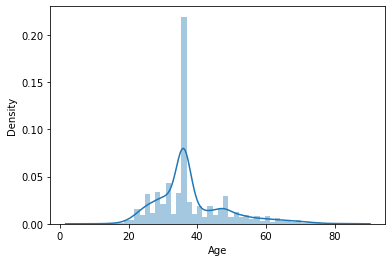

In [94]:
sns.distplot(Insurance['Age'])

# Histogram Review for Insurance['Age']Shows -
#### 1) 1 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

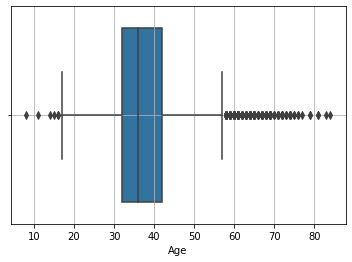

In [95]:
sns.boxplot(x=Insurance['Age']) 
plt.grid()

### Insurance['Age'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Insurance['Age'] Empirical Rule

In [96]:
x_1std= Insurance['Age'].mean() + (1 * Insurance['Age'].std())
y_1std= Insurance['Age'].mean() - (1 * Insurance['Age'].std())
x_2std= Insurance['Age'].mean() + (2 * Insurance['Age'].std())
y_2std= Insurance['Age'].mean() - (2 * Insurance['Age'].std())
x_3std= Insurance['Age'].mean() + (3 * Insurance['Age'].std())
y_3std= Insurance['Age'].mean() - (3 * Insurance['Age'].std())

Sample_size=len(Insurance['Age'])

is_between11 = Insurance['Age'].between(Insurance['Age'].mean(),x_1std, inclusive=False )
Level11=len(Insurance[is_between11])
is_between12 = Insurance['Age'].between(y_1std,Insurance['Age'].mean(), inclusive=False )
Level12=len(Insurance[is_between12]) 

is_between21 = Insurance['Age'].between(Insurance['Age'].mean(),x_2std, inclusive=False )
Level21=len(Insurance[is_between21])
is_between22 = Insurance['Age'].between(y_2std,Insurance['Age'].mean(), inclusive=False )
Level22=len(Insurance[is_between22])

is_between31 = Insurance['Age'].between(Insurance['Age'].mean(),x_3std, inclusive=False )
Level31=len(Insurance[is_between31])
is_between32 = Insurance['Age'].between(y_3std,Insurance['Age'].mean(), inclusive=False )
Level32=len(Insurance[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  1020.0 where as they are  476
Number of Mean - 1 Sigma occurances should be  1020.0 where as they are  1743
Number of Mean + 2 Sigma occurances should be  1425.0 where as they are  736
Number of Mean - 2 Sigma occurances should be  1425.0 where as they are  2091
Number of Mean + 3 Sigma occurances should be  1495.5 where as they are  864
Number of Mean - 3 Sigma occurances should be  1495.5 where as they are  2100


### Insurance['Age'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Insurance['Age']mean,median and mode

In [97]:
a=Insurance['Age'].mean()
b=Insurance['Age'].median()
c=Insurance['Age'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 38.091 Median = 36.0 Mode = 36.0


### Insurance['Age'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Age of insured  range from 8 year to 84 years

75% of the insured is less than 42 years

From above figure, we can say that the Age of insured  is right skewed

Average age of insured is 38 years which is mirginally higher than the median value 36 years indicating that the ditribution is right tailed. 

There are so many Outliers  which shows data inconsistency.

## Insurance['Commision']   5 Number Analysis

In [ ]:
Insurance_univariant_detailed.loc['Commision']

### Insurance['Commision']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 0.00  <  Max - Q3 which is  192.98
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 4.63 <  (Max - Q2) which is  205.58
        (Q2 - Q1 ) which is 4.63 < (Q3 - Q2 ) which is  12.61
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

In [ ]:
sns.distplot(Insurance['Commision'])

# Histogram Review for Insurance['Commision']Shows -
#### 1) 1 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

In [ ]:
sns.boxplot(x=Insurance['Commision']) 
plt.grid()

### Insurance['Commision'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Insurance['Commision'] Empirical Rule

In [ ]:
x_1std= Insurance['Commision'].mean() + (1 * Insurance['Commision'].std())
y_1std= Insurance['Commision'].mean() - (1 * Insurance['Commision'].std())
x_2std= Insurance['Commision'].mean() + (2 * Insurance['Commision'].std())
y_2std= Insurance['Commision'].mean() - (2 * Insurance['Commision'].std())
x_3std= Insurance['Commision'].mean() + (3 * Insurance['Commision'].std())
y_3std= Insurance['Commision'].mean() - (3 * Insurance['Commision'].std())

Sample_size=len(Insurance['Commision'])

is_between11 = Insurance['Commision'].between(Insurance['Commision'].mean(),x_1std, inclusive=False )
Level11=len(Insurance[is_between11])
is_between12 = Insurance['Commision'].between(y_1std,Insurance['Commision'].mean(), inclusive=False )
Level12=len(Insurance[is_between12]) 

is_between21 = Insurance['Commision'].between(Insurance['Commision'].mean(),x_2std, inclusive=False )
Level21=len(Insurance[is_between21])
is_between22 = Insurance['Commision'].between(y_2std,Insurance['Commision'].mean(), inclusive=False )
Level22=len(Insurance[is_between22])

is_between31 = Insurance['Commision'].between(Insurance['Commision'].mean(),x_3std, inclusive=False )
Level31=len(Insurance[is_between31])
is_between32 = Insurance['Commision'].between(y_3std,Insurance['Commision'].mean(), inclusive=False )
Level32=len(Insurance[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

### Insurance['Commision'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Insurance['Commision']mean,median and mode

In [ ]:
a=Insurance['Commision'].mean()
b=Insurance['Commision'].median()
c=Insurance['Commision'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

### Insurance['Commision'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

The commission received for tour insurance firm range from 0 to 210.21

For 75% of the insured, The commission received for tour insurance is less than 17.23

From above figure, we can say that the Age of insured  is right skewed

Average commission received for tour insurance is 14.53 which is higher than the median value 4.63 indicating that the ditribution is right tailed. 

There are so many Outliers which shows data inconsistency, most of the outliers are on higher side

## Insurance['Duration']   5 Number Analysis

In [ ]:
Insurance_univariant_detailed.loc['Duration']

## Insurance['Duration']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 12.00  <  Max - Q3 which is 4517.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 27.50 <  (Max - Q2) which is 4553.50
        (Q2 - Q1 ) which is 15.50< (Q3 - Q2 ) which is 36.50
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

In [ ]:
sns.distplot(Insurance['Duration'])

# Histogram Review for Insurance['Duration']Shows -
#### 1) 1 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

In [ ]:
sns.boxplot(x=Insurance['Duration']) 
plt.grid()

### Insurance['Duration'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Insurance['Duration'] Empirical Rule

In [ ]:
x_1std= Insurance['Duration'].mean() + (1 * Insurance['Duration'].std())
y_1std= Insurance['Duration'].mean() - (1 * Insurance['Duration'].std())
x_2std= Insurance['Duration'].mean() + (2 * Insurance['Duration'].std())
y_2std= Insurance['Duration'].mean() - (2 * Insurance['Duration'].std())
x_3std= Insurance['Duration'].mean() + (3 * Insurance['Duration'].std())
y_3std= Insurance['Duration'].mean() - (3 * Insurance['Duration'].std())

Sample_size=len(Insurance['Duration'])

is_between11 = Insurance['Duration'].between(Insurance['Duration'].mean(),x_1std, inclusive=False )
Level11=len(Insurance[is_between11])
is_between12 = Insurance['Duration'].between(y_1std,Insurance['Duration'].mean(), inclusive=False )
Level12=len(Insurance[is_between12]) 

is_between21 = Insurance['Duration'].between(Insurance['Duration'].mean(),x_2std, inclusive=False )
Level21=len(Insurance[is_between21])
is_between22 = Insurance['Duration'].between(y_2std,Insurance['Duration'].mean(), inclusive=False )
Level22=len(Insurance[is_between22])

is_between31 = Insurance['Duration'].between(Insurance['Duration'].mean(),x_3std, inclusive=False )
Level31=len(Insurance[is_between31])
is_between32 = Insurance['Duration'].between(y_3std,Insurance['Duration'].mean(), inclusive=False )
Level32=len(Insurance[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

### Insurance['Duration'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Insurance['Duration']mean,median and mode

In [ ]:
a=Insurance['Duration'].mean()
b=Insurance['Duration'].median()
c=Insurance['Duration'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

### Insurance['Duration'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Duration of the tour range from 0 days to 4580 Days

75% of the insured  tours are for less than 63 days

From above figure, we can say that the Duration of the tour  is right skewed

Average age of insured is 70 days which is higher than the median value 26.50 days indicating that the ditribution is right tailed. 

There are so  many Outliers  which shows data inconsistency.

## Insurance['Sales']   5 Number Analysis

In [ ]:
Insurance_univariant_detailed.loc['Sales']

### Insurance['Sales']  review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is  20.00  <  Max - Q3 which is 470.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 33.00 <  (Max - Q2) which is 506.00
        (Q2 - Q1 ) which is 13.00 < (Q3 - Q2 ) which is 36.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

In [ ]:
sns.distplot(Insurance['Sales'])

# Histogram Review for Insurance['Sales']Shows -
#### 1) 1 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

In [ ]:
sns.boxplot(x=Insurance['Sales']) 
plt.grid()

### Insurance['Sales'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Insurance['Sales'] Empirical Rule

In [ ]:
x_1std= Insurance['Sales'].mean() + (1 * Insurance['Sales'].std())
y_1std= Insurance['Sales'].mean() - (1 * Insurance['Sales'].std())
x_2std= Insurance['Sales'].mean() + (2 * Insurance['Sales'].std())
y_2std= Insurance['Sales'].mean() - (2 * Insurance['Sales'].std())
x_3std= Insurance['Sales'].mean() + (3 * Insurance['Sales'].std())
y_3std= Insurance['Sales'].mean() - (3 * Insurance['Sales'].std())

Sample_size=len(Insurance['Sales'])

is_between11 = Insurance['Sales'].between(Insurance['Sales'].mean(),x_1std, inclusive=False )
Level11=len(Insurance[is_between11])
is_between12 = Insurance['Sales'].between(y_1std,Insurance['Sales'].mean(), inclusive=False )
Level12=len(Insurance[is_between12]) 

is_between21 = Insurance['Sales'].between(Insurance['Sales'].mean(),x_2std, inclusive=False )
Level21=len(Insurance[is_between21])
is_between22 = Insurance['Sales'].between(y_2std,Insurance['Sales'].mean(), inclusive=False )
Level22=len(Insurance[is_between22])

is_between31 = Insurance['Sales'].between(Insurance['Sales'].mean(),x_3std, inclusive=False )
Level31=len(Insurance[is_between31])
is_between32 = Insurance['Sales'].between(y_3std,Insurance['Sales'].mean(), inclusive=False )
Level32=len(Insurance[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

### Insurance['Sales'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Insurance['Sales']mean,median and mode

In [ ]:
a=Insurance['Sales'].mean()
b=Insurance['Sales'].median()
c=Insurance['Sales'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

### Insurance['Sales'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Amount of sales of tour insurance policies range from 0 to 539.00

75% of the policies get is less than 69 Amount of sales

From above figure, we can say that the Age of insured  is right skewed

Average Amount of sales of tour insurance policies is 60.25 which is higher than the median value 33.00 indicating that the ditribution is right tailed. 

There are so many Outliers  which shows data inconsistency.

####  Bivariate Analysis

In [ ]:
sns.scatterplot(x='Age', y='Agency_Code', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Type', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Claimed', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Commision', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Channel', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Duration', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Sales', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Product Name', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Age', y='Destination', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Commision', y='Duration', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Commision', y='Sales', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Commision', y='Product Name', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Commision', y='Destination', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Duration', y='Sales', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Duration', y='Product Name', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Duration', y='Destination', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Sales', y='Product Name', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
sns.scatterplot(x='Sales', y='Destination', data=Insurance)
plt.ticklabel_format(style='plain', axis='x')

### Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

In [98]:
Sort_Age=np.sort(Insurance['Age'])
Count_Age=Insurance['Age'].count()
Q1_Age=np.percentile(Insurance['Age'],25, interpolation = 'midpoint')
Q2_Age=np.percentile(Insurance['Age'],50, interpolation = 'midpoint')
Q3_Age=np.percentile(Insurance['Age'],75, interpolation = 'midpoint')
IQR_Age=Q3_Age-Q1_Age
Low_Age=Q1_Age-1.5*IQR_Age
High_Age=Q3_Age+1.5*IQR_Age
Outlier_Age=[]
for x in Sort_Age:
    if (( x>High_Age) or ( x<Low_Age)):
        Outlier_Age.append(x)

Sort_Commision=np.sort(Insurance['Commision'])
Count_Commision=Insurance['Commision'].count()
Q1_Commision=np.percentile(Insurance['Commision'],25, interpolation = 'midpoint')
Q2_Commision=np.percentile(Insurance['Commision'],50, interpolation = 'midpoint')
Q3_Commision=np.percentile(Insurance['Commision'],75, interpolation = 'midpoint')
IQR_Commision=Q3_Commision-Q1_Commision
Low_Commision=Q1_Commision-1.5*IQR_Commision
High_Commision=Q3_Commision+1.5*IQR_Commision
Outlier_Commision=[]
for x in Sort_Commision:
    if (( x>High_Commision) or ( x<Low_Commision)):
        Outlier_Commision.append(x)

Sort_Duration=np.sort(Insurance['Duration'])
Count_Duration=Insurance['Duration'].count()
Q1_Duration=np.percentile(Insurance['Duration'],25, interpolation = 'midpoint')
Q2_Duration=np.percentile(Insurance['Duration'],50, interpolation = 'midpoint')
Q3_Duration=np.percentile(Insurance['Duration'],75, interpolation = 'midpoint')
IQR_Duration=Q3_Duration-Q1_Duration
Low_Duration=Q1_Duration-1.5*IQR_Duration
High_Duration=Q3_Duration+1.5*IQR_Duration
Outlier_Duration=[]
for x in Sort_Duration:
    if (( x>High_Duration) or ( x<Low_Duration)):
        Outlier_Duration.append(x)


Sort_Sales=np.sort(Insurance['Sales'])
Count_Sales=Insurance['Sales'].count()
Q1_Sales=np.percentile(Insurance['Sales'],25, interpolation = 'midpoint')
Q2_Sales=np.percentile(Insurance['Sales'],50, interpolation = 'midpoint')
Q3_Sales=np.percentile(Insurance['Sales'],75, interpolation = 'midpoint')
IQR_Sales=Q3_Sales-Q1_Sales
Low_Sales=Q1_Sales-1.5*IQR_Sales
High_Sales=Q3_Sales+1.5*IQR_Sales
Outlier_Sales=[]
for x in Sort_Sales:
    if (( x>High_Sales) or ( x<Low_Sales)):
        Outlier_Sales.append(x)

print('There are ',len(Outlier_Age), ' outliers for "Age" is',round(len(Outlier_Age) * 100/ Count_Age,2),'% of total and  which are lower than ' , round(Low_Age,3) , ' Or Higher than ', round(High_Age,3))
print('There are ',len(Outlier_Commision), ' outliers for "Commision" is',round(len(Outlier_Commision) * 100/ Count_Commision,2),'% of total and  which are lower than ' , round(Low_Commision,3) , ' Or Higher than ', round(High_Commision,3))
print('There are ',len(Outlier_Duration), ' outliers for "Duration" is',round(len(Outlier_Duration) * 100/ Count_Duration,2),'% of total and  which are lower than ' , round(Low_Duration,3) , ' Or Higher than ', round(High_Duration,3))
print('There are ',len(Outlier_Sales), ' outliers for "Sales" is',round(len(Outlier_Sales) * 100/ Count_Sales,2),'% of total and  which are lower than ' , round(Low_Sales,3) , ' Or Higher than ', round(High_Sales,3))

There are  204  outliers for "Age" is 6.8 % of total and  which are lower than  17.0  Or Higher than  57.0
There are  362  outliers for "Commision" is 12.07 % of total and  which are lower than  -25.86  Or Higher than  43.1
There are  382  outliers for "Duration" is 12.73 % of total and  which are lower than  -67.0  Or Higher than  141.0
There are  353  outliers for "Sales" is 11.77 % of total and  which are lower than  -53.5  Or Higher than  142.5


In [99]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [100]:
Insurance_no_ol=Insurance.copy()
lrAge,urAge=remove_outlier(Insurance_no_ol['Age'])
Insurance_no_ol['Age']=np.where(Insurance_no_ol['Age']>urAge,urAge,Insurance_no_ol['Age'])
Insurance_no_ol['Age']=np.where(Insurance_no_ol['Age']<lrAge,lrAge,Insurance_no_ol['Age'])

lrCommision,urCommision=remove_outlier(Insurance_no_ol['Commision'])
Insurance_no_ol['Commision']=np.where(Insurance_no_ol['Commision']>urCommision,urCommision,Insurance_no_ol['Commision'])
Insurance_no_ol['Commision']=np.where(Insurance_no_ol['Commision']<lrCommision,lrCommision,Insurance_no_ol['Commision'])

lrDuration,urDuration=remove_outlier(Insurance_no_ol['Duration'])
Insurance_no_ol['Duration']=np.where(Insurance_no_ol['Duration']>urDuration,urDuration,Insurance_no_ol['Duration'])
Insurance_no_ol['Duration']=np.where(Insurance_no_ol['Duration']<lrDuration,lrDuration,Insurance_no_ol['Duration'])

lrSales,urSales=remove_outlier(Insurance_no_ol['Sales'])
Insurance_no_ol['Sales']=np.where(Insurance_no_ol['Sales']>urSales,urSales,Insurance_no_ol['Sales'])
Insurance_no_ol['Sales']=np.where(Insurance_no_ol['Sales']<lrSales,lrSales,Insurance_no_ol['Sales'])
Insurance_no_ol.shape

(3000, 10)

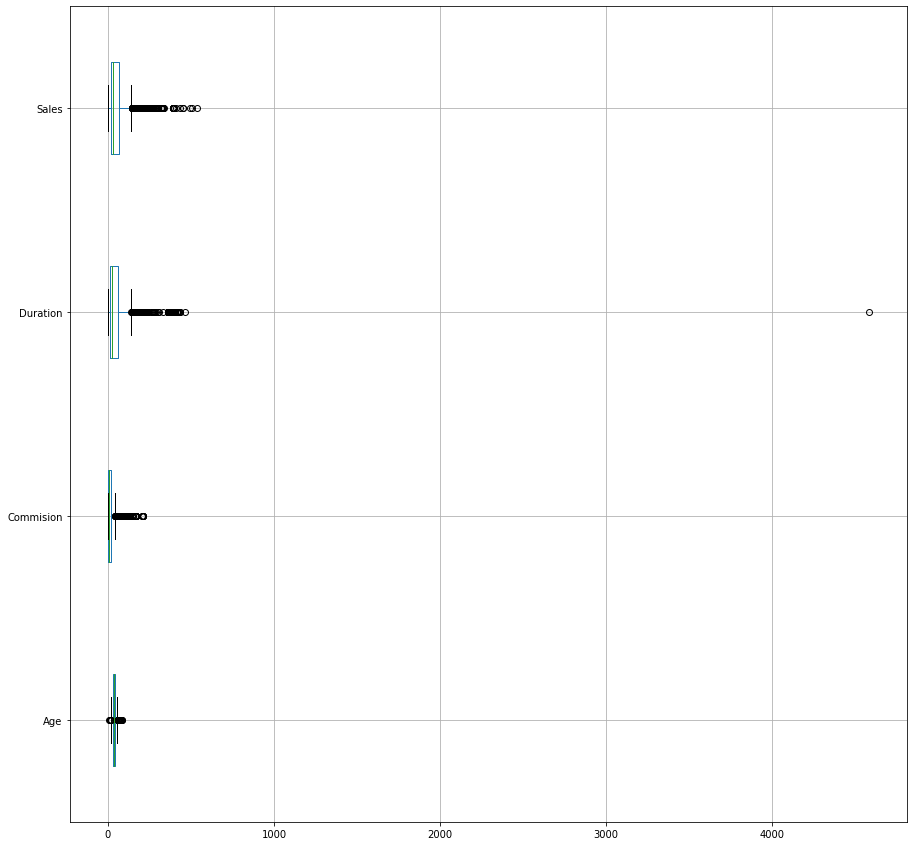

In [101]:
plt.figure(figsize=(15,15))
Insurance[['Age','Commision','Duration', 'Sales']].boxplot(vert=0);

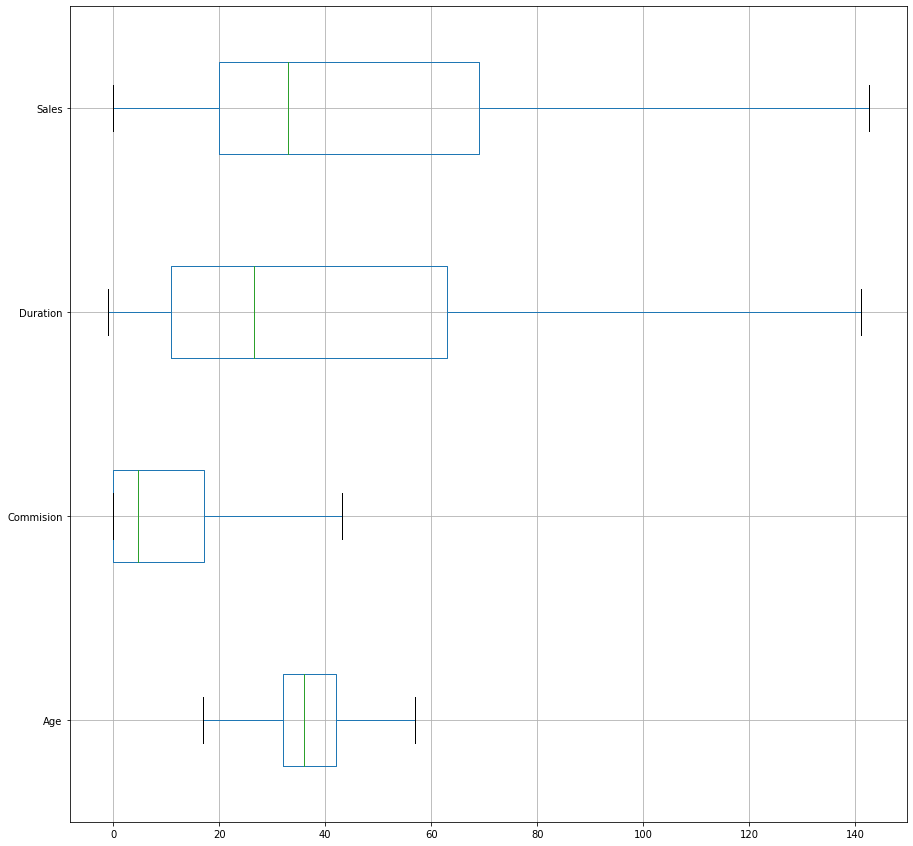

In [102]:
plt.figure(figsize=(15,15))
Insurance_no_ol[['Age','Commision','Duration', 'Sales']].boxplot(vert=0);

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# Checking the data

In [103]:
Insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [104]:
Insurance.rename(columns = {"Product Name": "Product_Name"}, inplace=True)

### Geting unique counts of all Objects

In [105]:
print('Age \n',Insurance.Age.value_counts())
print('\n')
print('Agency_Code \n',Insurance.Agency_Code.value_counts())
print('\n')
print('Type \n',Insurance.Type.value_counts())
print('\n')
print('Claimed \n',Insurance.Claimed.value_counts())
print('\n')
print('Commision \n',Insurance.Commision.value_counts())
print('\n')
print('Channel \n',Insurance.Channel.value_counts())
print('\n')
print('Duration \n',Insurance.Duration.value_counts())
print('\n')
print('Sales \n',Insurance.Sales.value_counts())
print('\n')
print('Product Name \n',Insurance.Product_Name.value_counts())
print('\n')
print('Destination \n',Insurance.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
8       1
84      1
83      1
15      1
11      1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
23.76      61
54.00      61
17.82      57
         ... 
49.40       1
68.08       1
15.56       1
1.25        1
13.50       1
Name: Commision, Length: 324, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Duration 
 8      83
5      82
10     81
6      81
11     81
       ..
393     1
244     1
208     1
431     1
416     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
171.00      1
159.00      1
177.00      1
1.99        1
287.40      

In [106]:
for feature in Insurance.columns: 
    if Insurance[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Insurance[feature].unique()))
        print(pd.Categorical(Insurance[feature].unique()).codes)
        Insurance[feature] = pd.Categorical(Insurance[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product_Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [107]:
print('Agency_Code \n',Insurance.Agency_Code.value_counts())
print('\n')
print('Type \n',Insurance.Type.value_counts())
print('\n')
print('Claimed \n',Insurance.Claimed.value_counts())
print('\n')
print('Channel \n',Insurance.Channel.value_counts())
print('\n')
print('Product Name \n',Insurance.Product_Name.value_counts())
print('\n')
print('Destination \n',Insurance.Destination.value_counts())

Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Product Name 
 2    1136
1     678
0     650
4     427
3     109
Name: Product_Name, dtype: int64


Destination 
 0    2465
1     320
2     215
Name: Destination, dtype: int64


In [108]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product_Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [109]:
Insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


Label Encoding has been done and all columns are converted to number

In [110]:
Insurance.Claimed.value_counts(normalize=True)

0   0.69
1   0.31
Name: Claimed, dtype: float64

### Extracting the target column into separate vectors for training set and test set

In [111]:
X = Insurance.drop("Claimed", axis=1)

y = Insurance.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [113]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


### Building a Decision Tree Classifier

In [114]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini')

In [115]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [118]:
X_train

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product_Name,Destination
1045,36,2,1,0.00,1,30,20.00,2,0
2717,36,2,1,0.00,1,139,42.00,2,1
2835,28,0,0,46.96,1,367,187.85,4,0
2913,28,0,0,12.13,1,29,48.50,4,0
959,48,1,1,18.62,1,53,49.00,3,0
...,...,...,...,...,...,...,...,...,...
2763,39,0,0,34.13,1,55,136.50,3,0
905,41,0,0,6.00,1,9,15.00,0,0
1096,36,2,1,0.00,1,131,63.00,2,0
235,44,3,0,6.30,1,6,18.00,0,0


In [119]:
list(X_train)

['Age',
 'Agency_Code',
 'Type',
 'Commision',
 'Channel',
 'Duration',
 'Sales',
 'Product_Name',
 'Destination']

In [117]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('Insurance_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=Insurance_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Insurance_Tree_File.close()

The above code will save a .dot file in working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/


### Variable Importance

In [155]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

              Imp
Duration     0.26
Sales        0.20
Agency_Code  0.19
Age          0.18
Commision    0.09
Product_Name 0.04
Destination  0.02
Channel      0.01
Type         0.00


### Predicting Test Data

In [156]:
y_predict = dt_model.predict(X_test)

In [157]:
y_predict.shape

(900,)

In [158]:
y_predict

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

# Regularising the Decision Tree

### Adding Tuning Parameters

In [159]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=60,min_samples_split=250)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=60, min_samples_split=250)

### Generating New Tree

In [160]:
Insurance_tree_regularized = open('Insurance_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= Insurance_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

Insurance_tree_regularized.close()

### Variable Importance

In [161]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

              Imp
Agency_Code  0.63
Sales        0.26
Product_Name 0.06
Duration     0.03
Age          0.02
Commision    0.00
Type         0.00
Channel      0.00
Destination  0.00


### Predicting on Training and Test dataset

In [162]:
# Complete the below code
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [163]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2100,)
ytest_predict (900,)


In [164]:
ytrain_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int8)

### Getting the Predicted Classes

In [165]:
ytest_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

### Getting the Predicted Probabilities

In [166]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.88780488, 0.11219512],
       [0.44081633, 0.55918367],
       [0.44081633, 0.55918367],
       ...,
       [0.44081633, 0.55918367],
       [0.88405797, 0.11594203],
       [0.88405797, 0.11594203]])

In [167]:
 pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.89,0.11
1,0.44,0.56
2,0.44,0.56
3,0.30,0.70
4,0.94,0.06
5,0.68,0.32
6,0.88,0.12
7,0.56,0.44
8,0.68,0.32
9,0.44,0.56


# Model Evaluation

## Measuring AUC-ROC Curve

### AUC and ROC for the training data

AUC: 0.827


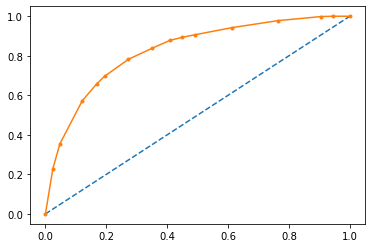

In [168]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.798


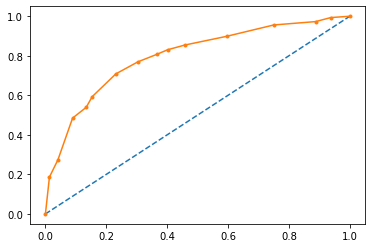

In [169]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [171]:
confusion_matrix(train_labels,ytrain_predict)

array([[1293,  178],
       [ 269,  360]], dtype=int64)

In [172]:
tn, fp, fn, tp = confusion_matrix(train_labels,ytrain_predict).ravel()

In [173]:
print('Precision= ', tp/(tp+fp) )
print('Recall= ', tp/(tp+fn) )
print('F1-Score= ', (2 * ((tp/(tp+fp)) * (tp/(tp+fn)))) / ((tp/(tp+fp))+ (tp/(tp+fn))))
print('Accuracy= ', (tp+tn)/(tp+tn+fp+fn))

Precision=  0.6691449814126395
Recall=  0.5723370429252782
F1-Score=  0.6169665809768637
Accuracy=  0.7871428571428571


In [174]:
print('Precision= ', tn/(tn+fn) )
print('Recall= ', tn/(tn+fp) )
print('F1-Score= ', (2 * ((tn/(tn+fn)) * (tn/(tn+fp)))) / ((tn/(tn+fn))+ (tn/(tn+fp))))
print('Accuracy= ', (tp+tn)/(tp+tn+fp+fn) )

Precision=  0.8277848911651728
Recall=  0.8789938817131203
F1-Score=  0.8526211671612264
Accuracy=  0.7871428571428571


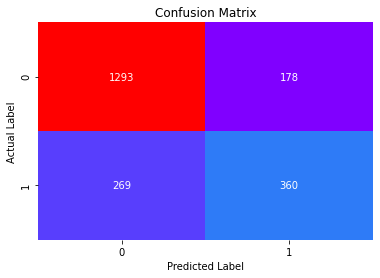

In [175]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [176]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.7871428571428571

In [177]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.57      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.73      2100
weighted avg       0.78      0.79      0.78      2100



## Confusion Matrix for the Testing data

In [178]:
confusion_matrix(test_labels,ytest_predict)

array([[551,  54],
       [152, 143]], dtype=int64)

In [179]:
tn, fp, fn, tp = confusion_matrix(test_labels,ytest_predict).ravel()

In [180]:
print('Precision= ', tp/(tp+fp) )
print('Recall= ', tp/(tp+fn) )
print('F1-Score= ', (2 * ((tp/(tp+fp)) * (tp/(tp+fn)))) / ((tp/(tp+fp))+ (tp/(tp+fn))))
print('Accuracy= ', (tp+tn)/(tp+tn+fp+fn))

Precision=  0.7258883248730964
Recall=  0.4847457627118644
F1-Score=  0.5813008130081301
Accuracy=  0.7711111111111111


In [181]:
print('Precision= ', tn/(tn+fn) )
print('Recall= ', tn/(tn+fp) )
print('F1-Score= ', (2 * ((tn/(tn+fn)) * (tn/(tn+fp)))) / ((tn/(tn+fn))+ (tn/(tn+fp))))
print('Accuracy= ', (tp+tn)/(tp+tn+fp+fn) )

Precision=  0.7837837837837838
Recall=  0.9107438016528926
F1-Score=  0.8425076452599388
Accuracy=  0.7711111111111111


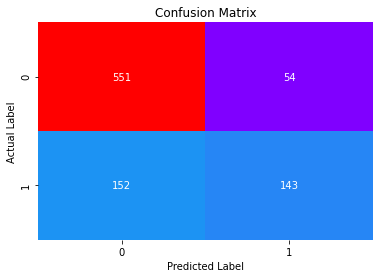

In [182]:
# Get the confusion matrix on the train data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [183]:
#test Data Accuracy
reg_dt_model.score(X_test,test_labels) 

0.7711111111111111

In [184]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



# Ensemble RandomForest Classifier

#### Building the Random Forest model

In [185]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 9, andfit it on the training data
rfcl = RandomForestClassifier(random_state=1,n_estimators=100,max_features=9)
rfcl = rfcl.fit(X_train, train_labels)

In [186]:
rfcl

RandomForestClassifier(max_features=9, random_state=1)

##### Predicting Train and Test data with the RF Model

In [187]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

**Train Accuracy**

In [188]:
rfcl.score(X_train,train_labels)

0.9947619047619047

#### Evaluating model performance with confusion matrix

In [189]:
from sklearn.metrics import confusion_matrix,classification_report

#### Evaluating model performance on the training data

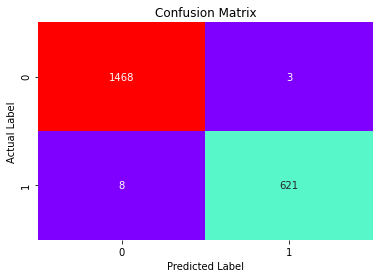

In [190]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [191]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1471
           1       1.00      0.99      0.99       629

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



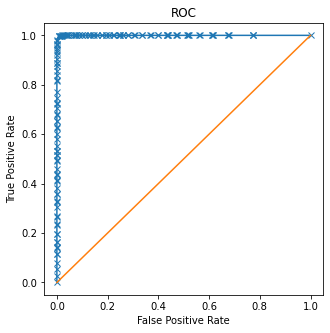

Area under Curve is 0.9999151588906457


In [192]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(5,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

#### Evaluating model performance on the test data

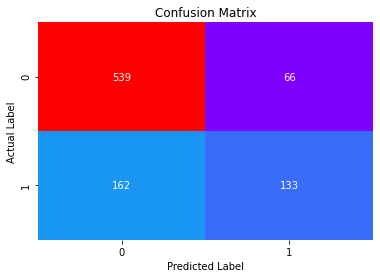

In [193]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [194]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       605
           1       0.67      0.45      0.54       295

    accuracy                           0.75       900
   macro avg       0.72      0.67      0.68       900
weighted avg       0.74      0.75      0.73       900



**Test Accuracy**

In [195]:
rfcl.score(X_test,test_labels)

0.7466666666666667

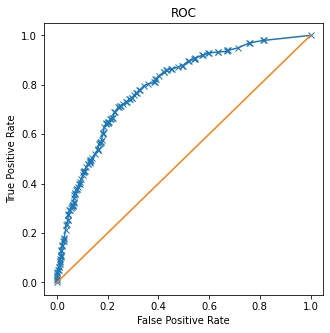

Area under Curve is 0.793962739879535


In [196]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

### Grid Search for finding out the optimal values for the hyper parameters

Note: runs for longer time on more data with more params
**As it may take too long to get the results, we can put these values:{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}**

In [197]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6,9],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [198]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6, 9],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [199]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}

In [200]:
best_grid = grid_search.best_estimator_

In [201]:
best_grid

RandomForestClassifier(max_depth=5, max_features=9, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=300, random_state=1)

In [202]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [203]:
confusion_matrix(train_labels,ytrain_predict)

array([[1316,  155],
       [ 247,  382]], dtype=int64)

In [204]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1471
           1       0.71      0.61      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



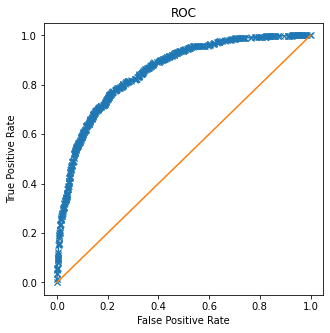

Area under Curve is 0.8563780519832825


In [205]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(5,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

In [206]:
confusion_matrix(test_labels,ytest_predict)

array([[548,  57],
       [150, 145]], dtype=int64)

In [207]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       605
           1       0.72      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



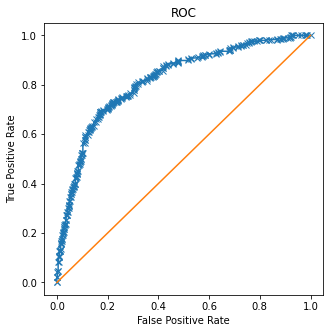

Area under Curve is 0.8189466311808377


In [208]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

### Building Neural Network Model

In [209]:
# Checking dimensions on the train and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train: ',train_labels.shape)
print('y_test: ',test_labels.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
y_train:  (2100,)
y_test:  (900,)
train_labels (2100,)
test_labels (900,)


### Scaling the variables

In [210]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [211]:
#Scale the training data
X_train = sc.fit_transform(X_train)

In [212]:
X_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [213]:
# Apply the transformation on the test data
X_test = sc.transform(X_test)

In [214]:
X_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [215]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.01)

In [216]:
# Fit the model on the training data
clf.fit(X_train,train_labels)

Iteration 1, loss = 0.73190828
Iteration 2, loss = 0.70481842
Iteration 3, loss = 0.67377712
Iteration 4, loss = 0.64619472
Iteration 5, loss = 0.62272023
Iteration 6, loss = 0.60330223
Iteration 7, loss = 0.58732612
Iteration 8, loss = 0.57422402
Iteration 9, loss = 0.56310704
Iteration 10, loss = 0.55382327
Iteration 11, loss = 0.54599574
Iteration 12, loss = 0.53911673
Iteration 13, loss = 0.53335898
Iteration 14, loss = 0.52839899
Iteration 15, loss = 0.52391237
Iteration 16, loss = 0.51999360
Iteration 17, loss = 0.51649432
Iteration 18, loss = 0.51346008
Iteration 19, loss = 0.51074817
Iteration 20, loss = 0.50822930
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

### Predicting training data

In [217]:
# use the model to predict the training data
y_pred = clf.predict(X_train)

### Evaluating model performance on training data

In [218]:
confusion_matrix(train_labels,y_pred)

array([[1396,   75],
       [ 432,  197]], dtype=int64)

In [219]:
print(classification_report(train_labels,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100



AUC: 0.792


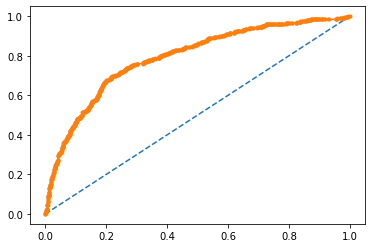

In [220]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Predicting Test Data and comparing model performance

In [221]:
y_pred = clf.predict(X_test)

In [222]:
confusion_matrix(test_labels, y_pred)

array([[582,  23],
       [216,  79]], dtype=int64)

In [223]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       605
           1       0.77      0.27      0.40       295

    accuracy                           0.73       900
   macro avg       0.75      0.61      0.61       900
weighted avg       0.74      0.73      0.69       900



AUC: 0.767


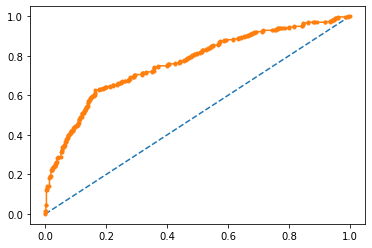

In [224]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model Tuning through Grid Search

In [225]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [226]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [5000, 2500, 7000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [227]:
grid_search.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [228]:
best_grid = grid_search.best_estimator_

In [229]:
best_grid

MLPClassifier(hidden_layer_sizes=300, max_iter=5000, random_state=1, tol=0.01)

In [230]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [231]:
confusion_matrix(train_labels,ytrain_predict)

array([[1327,  144],
       [ 317,  312]], dtype=int64)

In [232]:
# Accuracy of Train data
best_grid.score(X_train,train_labels)

0.7804761904761904

In [233]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.68      0.50      0.58       629

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.71      2100
weighted avg       0.77      0.78      0.77      2100



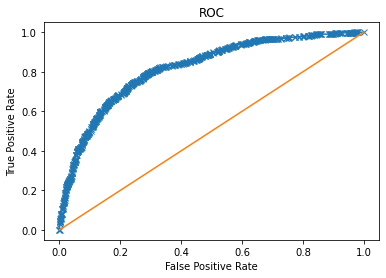

Area under Curve is 0.8193127545908767


In [234]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

In [235]:
confusion_matrix(test_labels,ytest_predict)

array([[561,  44],
       [171, 124]], dtype=int64)

In [236]:
# Accuracy of Test data
best_grid.score(X_test, test_labels)

0.7611111111111111

In [237]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       605
           1       0.74      0.42      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.69       900
weighted avg       0.76      0.76      0.74       900



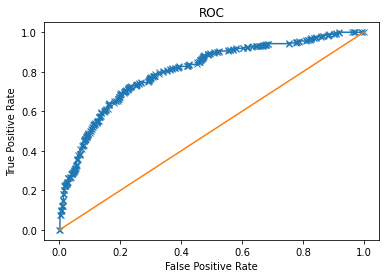

Area under Curve is 0.8057795209413083


In [238]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

## Conclusion

### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

### 2.4  Final Model: Compare all the models and write an inference which model is best/optimized.

### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations